In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob2

In [142]:
# Define the path to the dataset folder
dataset_folder = '/content/drive/MyDrive/AI ML  projects/Datasets/Dataset 1'

In [143]:
# Use glob to retrieve all CSV files in the dataset folder
csv_files = glob2.glob(dataset_folder + '/*.csv')
excel_files = glob2.glob(dataset_folder + '/*.xlsx')

In [144]:
# Create an empty list to store DataFrames
dfs = []

In [145]:
# Import each CSV file and append its DataFrame to the list
for file in csv_files:
    dfs.append(pd.read_csv(file))
for file in excel_files:
    dfs.append(pd.read_excel(file))

In [146]:
combined_df = pd.concat(dfs, ignore_index=True)

In [147]:
# Access each DataFrame from the list
for i, df in enumerate(dfs):
    print(f'DataFrame {i+1}:')
    print(df.head())  # Display the first few rows of the DataFrame
    print('\n')  # Add a newline for clarity

DataFrame 1:
                                                name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105    77.7218   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   29.3105    77.7218   

   type  
0  12.0  
1  12.0  
2  12.0

## Dataset 1

In [148]:
df_cs=dfs[0]

### Data cleaning and preprocessing (Charging Station)

In [149]:
df_cs.head(10)


,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0
5,Krishna Hansraj Hotel Una DC charging station,Himachal Pradesh,Una,"Old Hoshiarpur Rd, Una, Himachal Pradesh 174303",31.4668,76.2568,12.0
6,SG Jabli DC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.879,76.9948,12.0
7,SG Jabli AC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.879,76.9948,12.0
8,SG Karnal DC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0
9,SG Karnal AC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0


In [150]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [151]:
df_cs.duplicated().sum()

205

In [152]:
df_cs=df_cs.drop_duplicates()

In [153]:
df_cs.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [154]:
df_cs=df_cs.dropna()

In [155]:
df_cs = df_cs.drop(columns=['address'], axis=1)


In [156]:
# Remove non-numeric characters (e.g., comma) from the 'lattitude' column
df_cs['lattitude'] = df_cs['lattitude'].str.replace(',', '')

# Convert the cleaned 'lattitude' column to float
df_cs['lattitude'] = df_cs['lattitude'].astype(float)


In [157]:
df_cs.describe(include='all')

,name,state,city,lattitude,longitude,type
count,1291,1291,1291,1291.000000,1.291000e+03,1291.000000
unique,1100,59,338,NaN,NaN,NaN
top,Tata Power,Maharashtra,New Delhi,NaN,NaN,NaN
freq,58,211,67,NaN,NaN,NaN
mean,NaN,NaN,NaN,19.907463,6.599958e+04,8.928737
std,NaN,NaN,NaN,6.932307,2.368613e+06,4.167747
min,NaN,NaN,NaN,8.390198,8.058454e+00,6.000000
25%,NaN,NaN,NaN,13.032111,7.578536e+01,7.000000
50%,NaN,NaN,NaN,19.051601,7.721756e+01,7.000000
75%,NaN,NaN,NaN,27.179942,7.846415e+01,10.000000


In [158]:
df_cs['state'].value_counts()

Maharashtra         211
Delhi               123
Karnataka           113
Tamil Nadu          112
Kerala               78
Uttar Pradesh        71
Telangana            64
Gujarat              58
Rajasthan            50
Haryana              48
Delhi NCR            48
West Bengal          43
Andhra Pradesh       31
Odisha               26
Andhra pradesh       24
TAMIL NADU           20
Uttarakhand          17
Punjab               15
Madhya Pradesh       15
Jharkhand            15
Chhattisgarh         11
PUNJAB                9
Goa                   8
TamilNadu             7
Bihar                 7
Himachal Pradesh      6
Assam                 6
Maharashra            5
TELENGANA             5
Chattisgarh           4
Jammu & Kashmir       3
WestBengal            3
Jammu                 3
Andra Pradesh         2
Puducherry            2
Uttrakhand            2
Uttarakhand           2
chattisgarh           2
Chandigarh            2
Jajpur                1
Uttarkhand            1
Rajahmundry     

In [159]:
# Standardize the case of state names to lowercase
df_cs['state'] = df_cs['state'].str.lower()

In [160]:
# Correct spelling mistakes and variations
corrections = {
    'andhra pradesh': 'andhra pradesh', 'andra pradesh': 'andhra pradesh', 'andhrapradesh':'andhra pradesh','rajahmundry':'andhra pradesh',
    'maharashtra':'maharashtra','maharashra':'maharashtra',
    'tamil nadu': 'tamil nadu', 'tamilnadu': 'tamil nadu', 'taminadu':'tamil nadu','pondicherry':'tamil nadu','puducherry':'tamil nadu',
    'telangana': 'telangana','telengana':'telangana','hyderabad':'telangana','hyderabadu00a0':'telangana',
    'kerala':'kerala','karala':'kerala','kochi':'kerala','ernakulam':'kerala',
    'rajasthan':'rajasthan','jajpur':'rajasthan','chikhali':'rajasthan',
    'haryana':'haryana','harayana':'haryana','chandigarh':'haryana','hisar':'haryana',
    'west bengal':'west bengal','westbengal':'west bengal',
    'odisha':'odisha','bhubhaneswar':'odisha',
    'uttarakhand':'uttarakhand','uttarkhand':'uttarakhand','uttrakhand':'uttarakhand',
    'chhattisgarh':'chhattisgarh','chattisgarh':'chhattisgarh',
    'jammu & kashmir':'jammu & kashmir','jammu':'jammu & kashmir',
    'gujarat':'gujarat','limbdi':'gujarat'

}

df_cs['state'] = df_cs['state'].replace(corrections)

# Remove leading and trailing whitespace
df_cs['state'] = df_cs['state'].str.strip()

# Display the cleaned state names
print(df_cs['state'].value_counts())


maharashtra         216
tamil nadu          143
delhi               123
karnataka           113
kerala               81
uttar pradesh        71
telangana            71
andhra pradesh       60
gujarat              59
haryana              52
rajasthan            52
delhi ncr            48
west bengal          46
odisha               27
punjab               24
uttarakhand          22
chhattisgarh         17
jharkhand            15
madhya pradesh       15
goa                   8
bihar                 7
jammu & kashmir       6
assam                 6
himachal pradesh      6
sikkim                1
tripura               1
andaman               1
Name: state, dtype: int64


In [161]:
# Group the data by 'city' and count the number of charging stations in each city
city_counts = df_cs['city'].value_counts()

# Display the top 10 performing cities
top_cities = city_counts.head(30)
print(top_cities)



New Delhi           67
Delhi               66
Mumbai              39
bengaluru           38
Chennai             36
Bangalore           31
chennai             28
Hyderabad           28
Pune                28
Gurgaon             24
mumbai              21
Noida               21
Ahmedabad           19
hyderabad           19
pune                17
Banglore            17
Kolkata             16
BANGALORE           15
Jaipur              13
ahmedabad           12
Nashik              12
Bhubaneswar         12
kochi               11
goa                 10
HYDERABAD           10
delhi               10
Thiruvanthapuram    10
coimbatore           9
calicut              9
Bengaluru            9
Name: city, dtype: int64


In [162]:
# Standardize the case of city names to lowercase
df_cs['city'] = df_cs['city'].str.lower()

In [163]:
# Correct spelling mistakes and variations of top cities only
corrections_topcities = {'delhi':'delhi','new delhi':'delhi',
               'bangalore':'bangalore','bengaluru':'bangalore','banglore':'bangalore',
               'thiruvananthapuram':'thiruvananthapuram','thiruvanthapuram':'thiruvananthapuram','trivandrum':'thiruvananthapuram'

}

df_cs['city'] = df_cs['city'].replace(corrections_topcities)

# Remove leading and trailing whitespace
df_cs['city'] = df_cs['city'].str.strip()

#updating the new correcting top performing cities
vc_cor_city=df_cs['city'].value_counts()
top_corrected_cities=vc_cor_city.head(30)

# Display the cleaned state names
print(top_corrected_cities)

delhi                 148
bangalore             110
chennai                66
mumbai                 63
hyderabad              57
pune                   45
ahmedabad              32
thiruvananthapuram     27
noida                  26
gurgaon                24
kochi                  22
jaipur                 21
nashik                 20
kolkata                17
gurugram               17
coimbatore             14
goa                    14
ghaziabad              13
raipur                 13
bhubaneswar            12
visakhapatnam          10
indore                 10
tirupati                9
haridwar                9
lucknow                 9
calicut                 9
siliguri                8
nagpur                  8
madurai                 8
guwahati                8
Name: city, dtype: int64


### Univariate Analysis(Charging station)

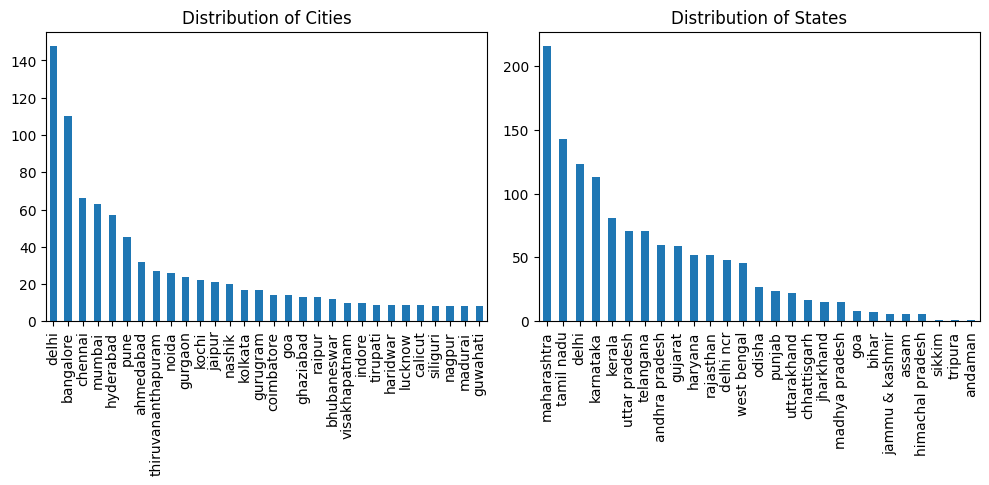

In [164]:
plt.figure(figsize=(10, 8))

# Plot the first subplot
plt.subplot(2, 2, 1)
top_corrected_cities.plot(kind='bar')
plt.title('Distribution of Cities')

# Plot the second subplot
plt.subplot(2, 2, 2)
df_cs['state'].value_counts().plot(kind='bar')
plt.title('Distribution of States')

# Show the plots
plt.tight_layout()
plt.show()

### Geographical Distribution:

In [165]:
import folium
from folium.plugins import MarkerCluster


# Create a map centered around the mean latitude and longitude
#map_center = [df_cs['lattitude'].mean(), df_cs['longitude'].mean()]
charging_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Create a MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(charging_map)

# Add markers for each charging station
for index, row in df_cs.iterrows():
    folium.Marker([row['lattitude'], row['longitude']], popup=row['name']).add_to(marker_cluster)
# Display the map
charging_map.save('charging_stations_map.html')

charging_map

**Inferences:**
The map shows that the majority of charging stations are located in urban areas such as city centers and along major highways. This suggests that charging infrastructure is currently focused on serving densely populated areas and facilitating long-distance travel.

## Dataset 2

In [166]:
dfs=dfs[1]

In [167]:
df.head()

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,station_type,postal_code,zone,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,charging,110001,central-delhi,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,charging,110001,central-delhi,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,charging,110001,central-delhi,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,charging,110001,central-delhi,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,charging,110001,central-delhi,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']


In [168]:
# As there are too many columns, lets transpose the data to have the better view
df.head().T

,0,1,2,3,4
uid,STATIC12,STATIC14,STATIC15,STATIC16,STATIC17
name,GensolCharge Pvt. Ltd.,REIL,REIL,REIL,BluSmart
vendor_name,GensolCharge Pvt. Ltd.,REIL,REIL,REIL,BluSmart
address,"NDSE Grid, BRPL South Extension",Scada office kalka ji,Ashram Chowk Mathura Road,Nizamuddin Railway station,"BSES Bhawan, Nehru Place, New Delhi 110048"
latitude,28.568238,28.541995,28.571189,28.588991,28.549427
longitude,77.219666,77.260583,77.259806,77.25324,77.254636
city,Delhi,Delhi,Delhi,Delhi,Delhi
country,India,India,India,India,India
open,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
close,23:59:59,23:59:59,23:59:59,23:59:59,23:59:59


#### Data cleaning and preprocessing

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              2705 non-null   object 
 1   name             2705 non-null   object 
 2   vendor_name      2705 non-null   object 
 3   address          2705 non-null   object 
 4   latitude         2705 non-null   float64
 5   longitude        2705 non-null   float64
 6   city             2705 non-null   object 
 7   country          2705 non-null   object 
 8   open             2705 non-null   object 
 9   close            2705 non-null   object 
 10  logo_url         2238 non-null   object 
 11  staff            2705 non-null   object 
 12  payment_modes    2705 non-null   object 
 13  contact_numbers  2705 non-null   object 
 14  station_type     2705 non-null   object 
 15  postal_code      2705 non-null   int64  
 16  zone             2410 non-null   object 
 17  available     

In [170]:
df.isnull().sum()

uid                  0
name                 0
vendor_name          0
address              0
latitude             0
longitude            0
city                 0
country              0
open                 0
close                0
logo_url           467
staff                0
payment_modes        0
contact_numbers      0
station_type         0
postal_code          0
zone               295
available          238
capacity           208
cost_per_unit      252
power_type         208
total              208
type               208
vehicle_type       208
dtype: int64

In [171]:
drop_col=["logo_url","zone","contact_numbers","open","close"]
df=df.drop(columns=drop_col, axis=1)

In [172]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

In [173]:
# Create a DataFrame with missing percentage information
missing_info = pd.DataFrame({'column': df.columns, 'missing_percentage': missing_percentage})


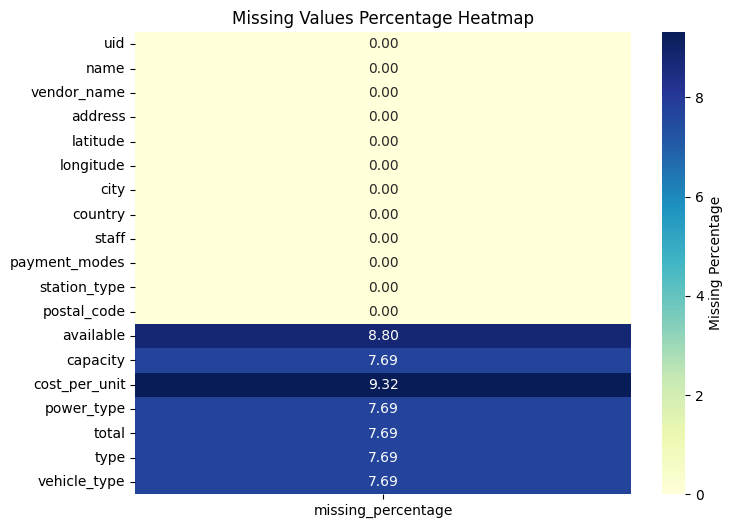

In [174]:
# Create a heatmap grid highlighting missing values percentage
plt.figure(figsize=(8, 6))
sns.heatmap(missing_info[['missing_percentage']], cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Missing Percentage'})
plt.title('Missing Values Percentage Heatmap')
plt.show()

In [175]:
columns_to_fill = ['capacity', 'cost_per_unit', 'power_type', 'total', 'type', 'vehicle_type', 'available']

for column in columns_to_fill:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [176]:
# Replace 'Delhi' with 'New Delhi' in the 'city' column
df['city'] = df['city'].replace('Delhi', 'New Delhi')

In [177]:
# Make data consistent
df['staff'] = df['staff'].replace('Staffed', 'staffed')
df['staff'] = df['staff'].replace('UnStaffed', 'unstaffed')
df['staff'] = df['staff'].replace('Unstaffed', 'unstaffed')

In [178]:
df['country']=df['country'].str.strip()

### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

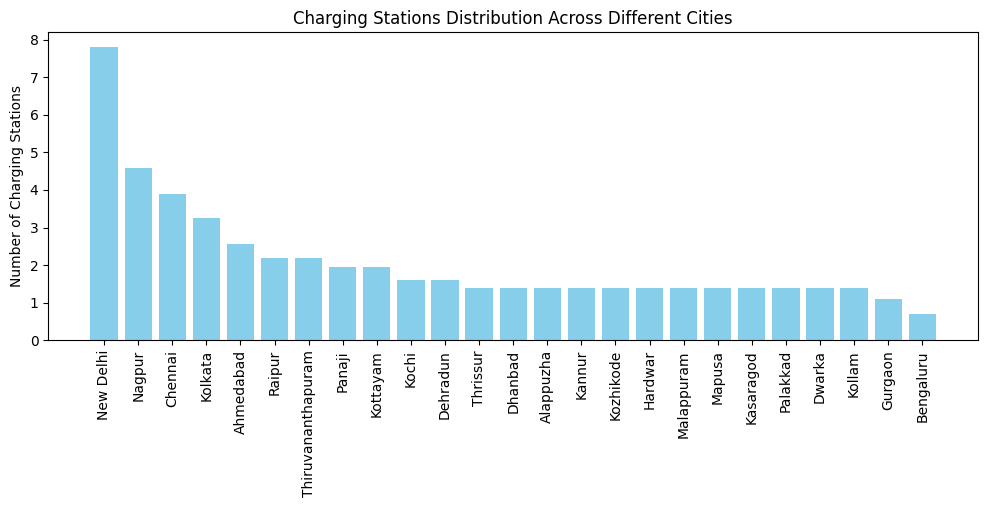

In [179]:
# 1. Check the distribution of charging stations across different cities in India.
plt.figure(figsize=(12,4))
city_distribution = df['city'].value_counts()
city_distribution = np.log1p(city_distribution)
plt.bar(city_distribution.index, city_distribution.values, color='skyblue')
plt.title('Charging Stations Distribution Across Different Cities')
plt.ylabel('Number of Charging Stations')
plt.xticks( rotation=90)
plt.show

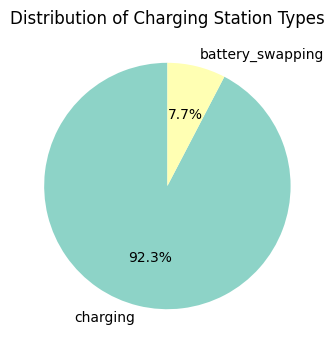

In [180]:
# 2. Explore the distribution of charging station types.
plt.figure(figsize=(4,4))
station_type_distribution = df['station_type'].value_counts()
plt.pie(station_type_distribution, labels=station_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Charging Station Types')
plt.show()

Text(0, 0.5, 'Number of Charging Stations')

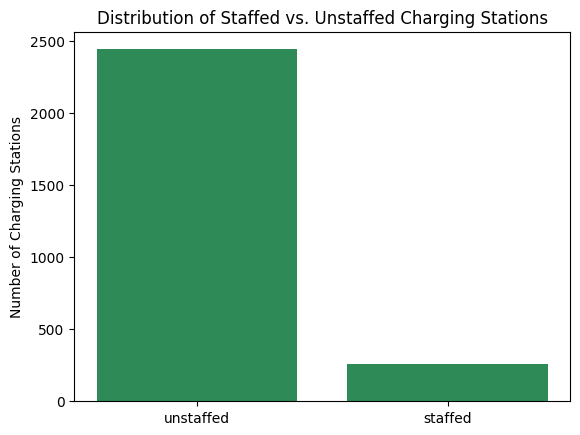

In [181]:
# 3. Explore the distribution of stations that are staffed vs. unstaffed.
staff_distribution = df['staff'].value_counts()
plt.bar(staff_distribution.index, staff_distribution.values, color='seagreen')
plt.title('Distribution of Staffed vs. Unstaffed Charging Stations')
plt.ylabel('Number of Charging Stations')

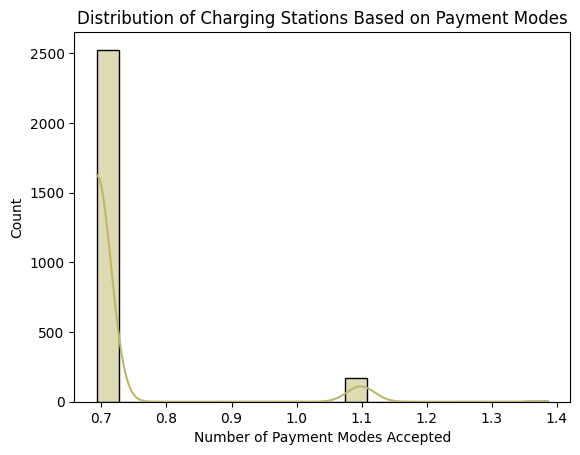

In [182]:
# 4. Analyze the distribution of charging stations based on payment modes accepted.
payment_modes_distribution = df['payment_modes'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
payment_modes_distribution = np.log1p(payment_modes_distribution)
sns.histplot(payment_modes_distribution, bins=20, kde=True, color='darkkhaki')
plt.title('Distribution of Charging Stations Based on Payment Modes')
plt.xlabel('Number of Payment Modes Accepted')
plt.show()

#### Distribution of charging station type

<ipython-input-183-ce4cc5886373>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='station_type', data=df, palette='viridis', ax=axes[0])
<ipython-input-183-ce4cc5886373>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='power_type', data=df, palette='viridis', ax=axes[1])


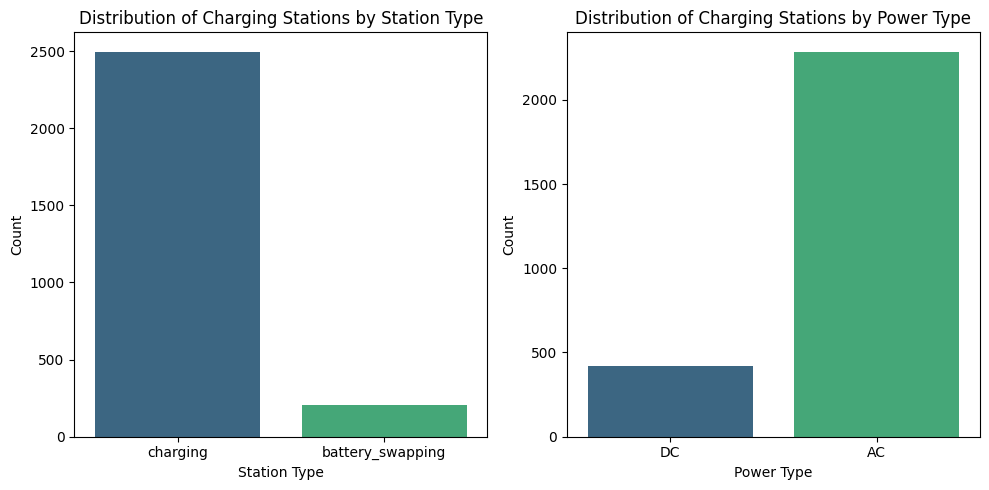

In [183]:
# Create subplots for station type and power type
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Investigate the distribution of cost per unit across different station types
sns.countplot(x='station_type', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Charging Stations by Station Type')
axes[0].set_xlabel('Station Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x')

# Investigate the distribution of cost per unit across different power types
sns.countplot(x='power_type', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Charging Stations by Power Type')
axes[1].set_xlabel('Power Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

**Inferences:** The Distribution of Charging Stations by Station Type barplot reveals that the majority of charging stations are of the standard charging type, with a smaller number of swapable battery stations. Additionally, there is a notable difference in the distribution of power types, with more stations providing AC power than DC power. This distribution suggests a prevalent preference for standard charging infrastructure over battery-swapping solutions. The higher prevalence of AC power stations could be attributed to their compatibility with a broader range of electric vehicles, while the presence of DC power stations indicates a recognition of the need for faster-charging capabilities in certain locations.

#### Charging Station Capacity analysis

<ipython-input-184-35b983347d65>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_counts.index, y=log_counts.values, palette="blend:#7AB,#EDA")


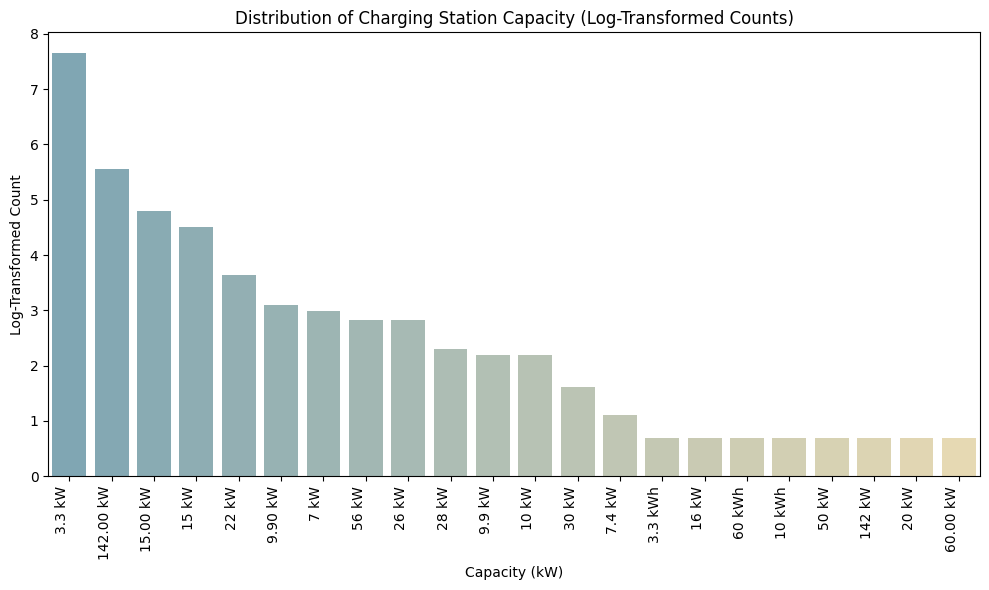

In [184]:
capacity_counts = df['capacity'].value_counts()

# Apply logarithm transformation to count values
log_counts = np.log1p(capacity_counts)

# Plot the distribution of charging station capacity with log-transformed counts
plt.figure(figsize=(10, 6))
sns.barplot(x=log_counts.index, y=log_counts.values, palette="blend:#7AB,#EDA")
plt.title('Distribution of Charging Station Capacity (Log-Transformed Counts)')
plt.xlabel('Capacity (kW)')
plt.ylabel('Log-Transformed Count')
plt.xticks(rotation=90, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

**Inferences:** The above barplot illustrates that the majority of charging stations have a capacity of 3.3 kW or lower, with 142 kW being the next most common capacity, followed by 15 kW. This distribution suggests that many charging stations are designed to accommodate lower power requirements, likely catering to smaller vehicles with lower energy demands. However, the presence of charging stations with higher capacities, such as 142 kW, indicates a recognition of the need to support fast-charging capabilities for larger vehicles or to meet the demand for rapid charging in certain locations. Understanding this distribution of charging station capacities is essential for electric vehicle infrastructure planning and deployment, ensuring that charging facilities are appropriately sized and located to meet the diverse needs of electric vehicle users across different regions and vehicle types.

### Vendor Distribution:

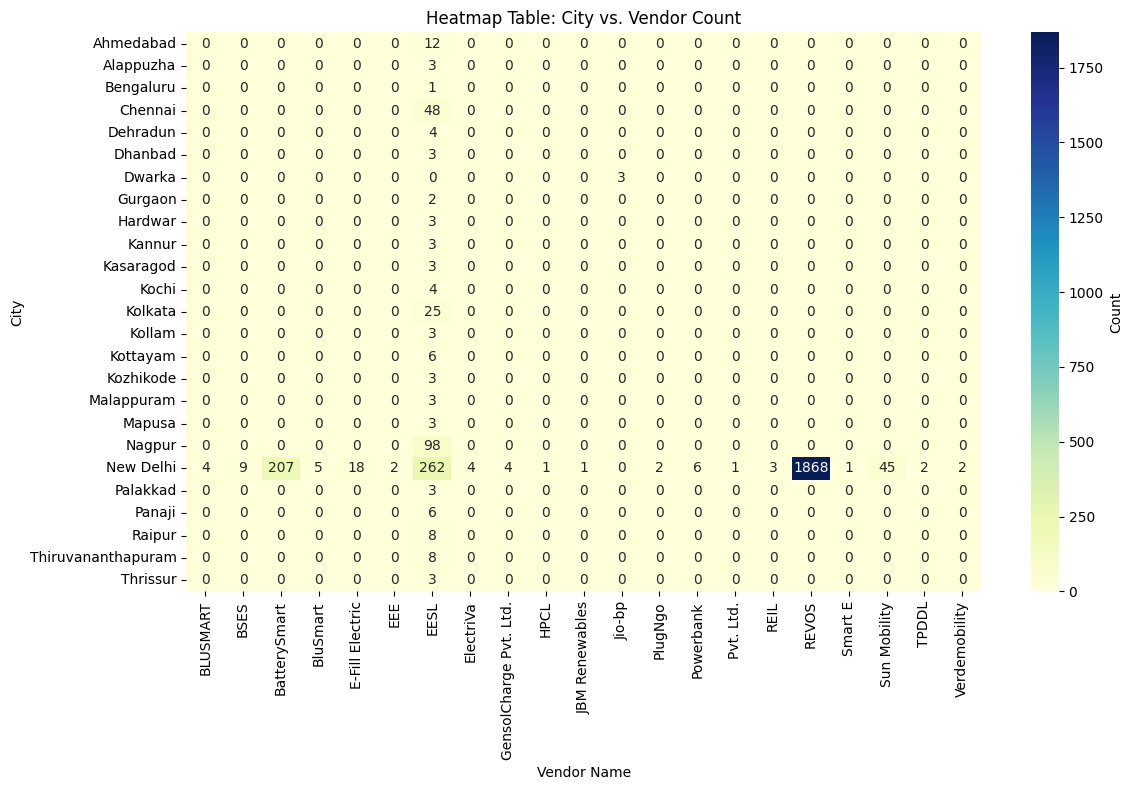

In [185]:
# Create a pivot table for city and vendor count
city_vendor_pivot = df.pivot_table(index='city', columns='vendor_name', values='uid', aggfunc='count', fill_value=0)

# Create a heatmap table
plt.figure(figsize=(12, 8))
sns.heatmap(city_vendor_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Count'}, fmt='g')
plt.title('Heatmap Table: City vs. Vendor Count')
plt.xlabel('Vendor Name')
plt.ylabel('City')

# Adjust layout
plt.tight_layout()
plt.show()

**Inference:** Upon examining the information for each marker, it becomes evident that Vendor 'REVOS' operates a larger number of charging stations in urban area like Delhi, while Vendor 'EESL' has a stronger presence in suburban and rural regions. This indicates differing strategies among charging station providers based on target demographics and market segmentation.

#### Vehicle type analysis

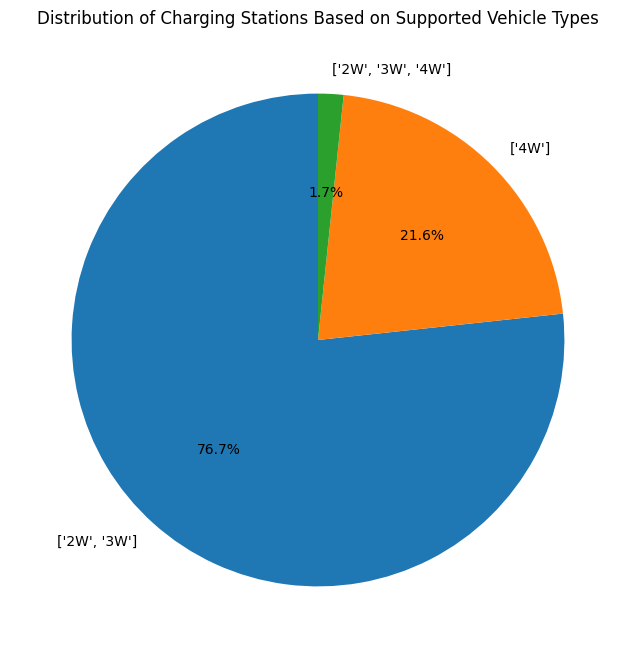

In [186]:
# Create a pie chart for the distribution of charging stations based on supported vehicle types
vehicle_type_counts = df['vehicle_type'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Charging Stations Based on Supported Vehicle Types')

# Show the plot
plt.show()

**Inference:** This Pie chart clearly shows that the majority of charging stations are built for 2-wheelers and 3-wheelers, accounting for over 77% of the total. In contrast, charging stations dedicated to 4-wheelers constitute just over 22%. This distribution underscores a significant focus on catering to the needs of smaller vehicles, such as motorcycles and auto-rickshaws, compared to larger vehicles like cars.